# Boston House Price Prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Dataset/HousingData.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
df = df.fillna(df.mean(numeric_only=True))
df.mean(numeric_only=True)

CRIM         3.611874
ZN          11.211934
INDUS       11.083992
CHAS         0.069959
NOX          0.554695
RM           6.284634
AGE         68.518519
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.715432
MEDV        22.532806
dtype: float64

In [9]:
x = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [10]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [11]:
y.head(1)

0    24.0
Name: MEDV, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred = model.predict(X_test)


In [15]:
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

comparison.head()

,Actual,Predicted
173,23.6,29.143250
274,32.4,36.535668
491,13.6,14.492513
72,22.8,25.081110
452,16.1,18.456092


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 25.017672023842703
R2 Score: 0.658852019550814


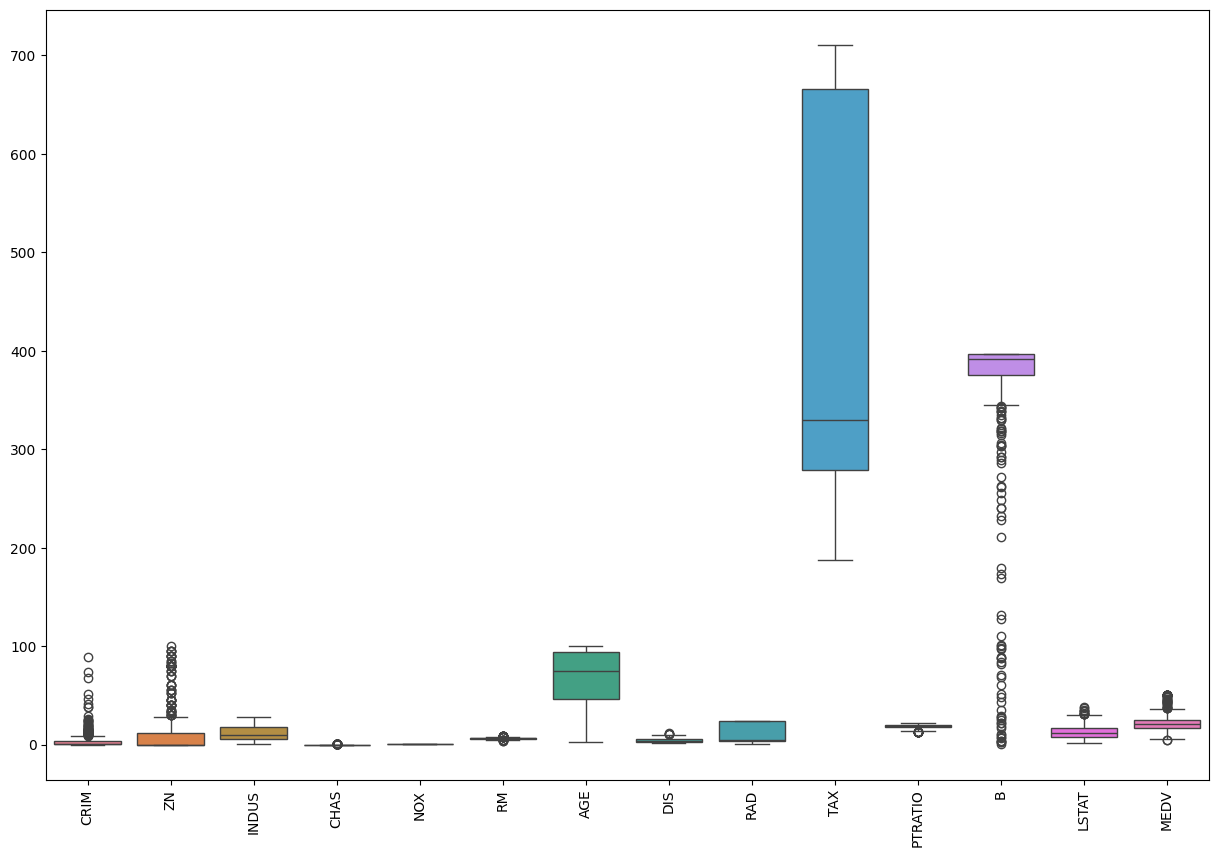

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [18]:
import joblib

joblib.dump(model, "boston_model.pkl")


['boston_model.pkl']

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
model1 = LinearRegression()

model1.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred1 = model1.predict(X_test)

In [22]:
comparison1 = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred1
})

comparison1.head()

,Actual,Predicted
173,23.6,29.143250
274,32.4,36.535668
491,13.6,14.492513
72,22.8,25.081110
452,16.1,18.456092


In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state = 42)

In [24]:
rf_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
rf_y_pred = rf_model.predict(X_test)

In [26]:
comparison = pd.DataFrame({"Actual":y_test,"Predicted":rf_y_pred})

In [27]:
comparison.head(5)

,Actual,Predicted
173,23.6,23.415
274,32.4,30.679
491,13.6,17.076
72,22.8,23.860
452,16.1,16.581


In [34]:
joblib.dump(rf_model, "boston_model_RF.pkl")

['boston_model_RF.pkl']

In [28]:
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest MSE:", rf_mse)
print("Random Forest R2:", rf_r2)


Random Forest MSE: 8.260524343137256
Random Forest R2: 0.8873571771815177


In [29]:
print("Linear R2:", r2)
print("Random Forest R2:", rf_r2)


Linear R2: 0.658852019550814
Random Forest R2: 0.8873571771815177


In [30]:
comparison = pd.DataFrame({
    "Actual": y_test,
    "Linear_Predicted": y_pred,
    "RF_Predicted": rf_y_pred
})

comparison["Linear_Error"] = abs(comparison["Actual"] - comparison["Linear_Predicted"])
comparison["RF_Error"] = abs(comparison["Actual"] - comparison["RF_Predicted"])

comparison.head(10)

,Actual,Linear_Predicted,RF_Predicted,Linear_Error,RF_Error
173,23.6,29.143250,23.415,5.543250,0.185
274,32.4,36.535668,30.679,4.135668,1.721
491,13.6,14.492513,17.076,0.892513,3.476
72,22.8,25.081110,23.860,2.281110,1.060
452,16.1,18.456092,16.581,2.356092,0.481
76,20.0,23.010494,21.647,3.010494,1.647
316,17.8,18.138686,18.934,0.338686,1.134
140,14.0,14.626517,16.081,0.626517,2.081
471,19.6,22.115894,21.177,2.515894,1.577
500,16.8,20.870636,21.306,4.070636,4.506


In [31]:
comparison["Linear_Error"].mean()

np.float64(3.149923357345782)

In [32]:
comparison["RF_Error"].mean()

np.float64(2.0666764705882357)

In [33]:
print("Linear R2:", r2)
print("Random Forest R2:", rf_r2)

Linear R2: 0.658852019550814
Random Forest R2: 0.8873571771815177


In [35]:
pip list

Package                   Version
------------------------- --------------
anyio                     4.10.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
bokeh                     3.7.3
certifi                   2025.8.3
cffi                      1.17.1
charset-normalizer        3.4.2
colorama                  0.4.6
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.15
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.0
Faker                     37.5.3
fastjsonschema            2.21.1
fonttools                 4.59.0
fqdn                      1.5.1
h11                       0.16.0
httpcore                  1.0.9
httpx        

In [36]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
